In [ ]:
# !pip install imblearn

In [1]:
import tensorflow as tf
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from tensorflow import keras
import matplotlib.pyplot as plot
import numpy as np
from imblearn.over_sampling import BorderlineSMOTE

Using TensorFlow backend.


In [2]:
np_Images = np.load('./dataset/Image_224.npy') #converting the list of images to numpy array.
np_Labels = np.load('./dataset/Label_224.npy')

In [3]:
print("Shape of Images:",np_Images.shape)
print("Shape of Labels:",np_Labels.shape)

Shape of Images: (16785, 224, 224, 3)
Shape of Labels: (16785,)


In [4]:
np.bincount(np_Labels)

array([9955,  229,  766, 2061,  426, 3348])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
len(np_Images)

16785

In [7]:
X_train_tmp, X_test, y_train_tmp, y_test = train_test_split(np_Images, np_Labels, test_size=0.1, random_state=1, stratify=np_Labels)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train_tmp, y_train_tmp, test_size=0.11, random_state=1 ,stratify=y_train_tmp)

In [10]:
np.bincount(y_train)

array([7973,  183,  613, 1651,  342, 2682])

In [11]:
len(X_train), len(y_train)

(13444, 13444)

In [ ]:
np.bincount(y_train)

In [12]:
X_train.shape, y_train.shape

((13444, 224, 224, 3), (13444,))

In [ ]:
# Images = (Images / 127.5) -1

In [13]:
np.bincount(y_train)

array([7973,  183,  613, 1651,  342, 2682])

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
np.bincount(y_train),np.bincount(y_test)

In [53]:
IMG_SHAPE = X_train[0].shape

base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=IMG_SHAPE,
                                            include_top=False,   
                                            weights='imagenet')

In [54]:
base_model.trainable = False

In [55]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [56]:
test_batch = tf.convert_to_tensor(X_train[0:4].astype(np.float32))
test_batch

<tf.Tensor 'Const_4:0' shape=(4, 224, 224, 3) dtype=float32>

In [57]:
feature_batch = base_model(test_batch)
print(feature_batch.shape)

(4, 7, 7, 1280)


In [58]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(4, 1280)


In [59]:
prediction_layer = keras.layers.Dense(6, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(4, 6)


In [60]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [61]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# from sklearn.utils import class_weight

# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(y_train),
#                                                  y_train)
# class_weights

In [13]:
# class_weight = {}

# for i in range(6):
#     class_weight[i] = class_weights[i]
    
# class_weight

In [14]:
# class_weight = [np.sqrt(np.sqrt(i)) for i in class_weights]
# class_weight

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 7686      
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


In [63]:
model.trainable_variables

[<tf.Variable 'dense_2/kernel:0' shape=(1280, 6) dtype=float32>,
 <tf.Variable 'dense_2/bias:0' shape=(6,) dtype=float32>]

In [17]:
# callback = [keras.callbacks.ModelCheckpoint('./checkpoint', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1),
#             keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)]

In [64]:
trained = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val,y_val))
# trained = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val,y_val), callbacks=callback)

Train on 13444 samples, validate on 1662 samples
Epoch 1/50
13444/13444 [==============================] - 18s 1ms/sample - loss: 1.0446 - acc: 0.6260 - val_loss: 1.4856 - val_acc: 0.3020
Epoch 2/50
13444/13444 [==============================] - 15s 1ms/sample - loss: 0.6614 - acc: 0.7896 - val_loss: 1.2948 - val_acc: 0.5265
Epoch 3/50
13444/13444 [==============================] - 15s 1ms/sample - loss: 0.5322 - acc: 0.8338 - val_loss: 1.3082 - val_acc: 0.5824
Epoch 4/50
13444/13444 [==============================] - 15s 1ms/sample - loss: 0.4659 - acc: 0.8534 - val_loss: 1.3511 - val_acc: 0.5909
Epoch 5/50
13444/13444 [==============================] - 15s 1ms/sample - loss: 0.4197 - acc: 0.8697 - val_loss: 1.4298 - val_acc: 0.5921
Epoch 6/50
13444/13444 [==============================] - 15s 1ms/sample - loss: 0.3938 - acc: 0.8762 - val_loss: 1.4757 - val_acc: 0.5933
Epoch 7/50
13444/13444 [==============================] - 15s 1ms/sample - loss: 0.3692 - acc: 0.8843 - val_loss: 1.5

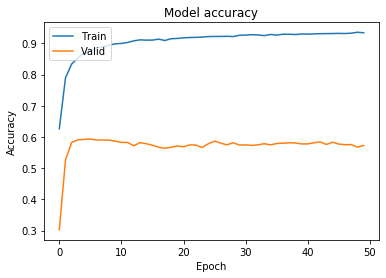

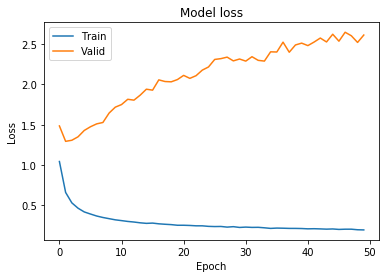

In [65]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Valid'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Valid'], loc='upper left')
plot.show()

In [66]:
# test_images,test_labels = get_images('./test/')
# test_images = np.array(test_images)
# test_labels = np.array(test_labels)
model.evaluate(X_test,y_test, verbose=1)

1679/1679 [==============================] - 2s 926us/sample - loss: 2.6428 - acc: 0.5765


[2.642834586994928, 0.5765337]

In [72]:
pred = model.predict(X_test)

In [77]:
np.argmax(pred) == y_test

array([False, False, False, ..., False, False, False])

In [79]:
pred

array([[9.5468032e-01, 4.5938040e-03, 3.0107875e-04, 2.6386841e-03,
        3.3252377e-02, 4.5337472e-03],
       [9.2327142e-01, 5.2940566e-02, 1.8991600e-04, 1.5604980e-02,
        1.1084127e-03, 6.8847337e-03],
       [9.0756130e-01, 5.3119309e-02, 6.4173699e-05, 1.0635954e-02,
        2.7721234e-02, 8.9799898e-04],
       ...,
       [9.4056165e-01, 5.3682610e-02, 3.4572743e-04, 4.3894248e-03,
        8.7622080e-05, 9.3296042e-04],
       [9.6753627e-01, 2.4529943e-02, 2.2691005e-05, 6.6179624e-03,
        1.0288472e-03, 2.6431109e-04],
       [9.8387653e-01, 4.4093258e-03, 1.2903410e-05, 5.6873588e-03,
        1.0971356e-03, 4.9167252e-03]], dtype=float32)

In [21]:
model.save('97_2_per_mobilenet_v2.h5')